In [280]:
pip install spotipy --upgrade


Requirement already up-to-date: spotipy in ./opt/anaconda3/lib/python3.7/site-packages (2.12.0)
Note: you may need to restart the kernel to use updated packages.


In [245]:
pip install pygal

     |████████████████████████████████| 133kB 3.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

In [30]:
#settings up spotify credentials to use spotify API

CLIENT_ID = "12756bdb627c4ca09e3369088ecd5c3e"
CLIENT_SECRET = "fa92ff2038b04c969a31541963c22f9b"
username = 'radha_katkamwar'
credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

market = [ "AD", "AR", "AT", "AU", "BE", "BG", "BO", "BR", "CA", "CH", "CL", "CO", "CR", "CY", 
      "CZ", "DE", "DK", "DO", "EC", "EE", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HU", 
      "ID", "IE", "IS", "IT", "JP", "LI", "LT", "LU", "LV", "MC", "MT", "MX", "MY", "NI", "NL", 
      "NO", "NZ", "PA", "PE", "PH", "PL", "PT", "PY", "SE", "SG", "SK", "SV", "TH", "TR", "TW", 
      "US", "UY", "VN" ]

token = credentials.get_access_token()
sp = spotipy.Spotify(auth=token)

/Users/radhakatkamwar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  app.launch_new_instance()


In [31]:
#get categoriesNames
def getCategoryNames():
    categ = sp.categories(country=None, locale=None, limit=20, offset=0)
    c = categ['categories']['items']
    categoryNames = []
    for d in c:
        categoryNames.append(d['id'])
    return categoryNames
    return categoryNames

In [32]:
getCategoryNames()

['toplists',
 'at_home',
 'hiphop',
 'pop',
 'country',
 'aapi_heritage_month',
 'workout',
 'decades',
 'mood',
 'rnb',
 'gaming',
 'latin',
 'focus',
 'chill',
 'rock',
 'edm_dance',
 'indie_alt',
 'wellness',
 'roots',
 'party']

In [33]:
#this gets all playlist ID's in a category
#i am currently in the process of seeing why this doesnt work when I call it in the getAllTracks method. It works otherwise and pulls all playlist id's in a certain category which the spotipy method does not do.
import requests
def getPlaylistIDs(category_id):
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': 'Bearer' + ' ' + token ,
    }
    params = (
        ('country', 'US'),
    )

    rsp = 'https://api.spotify.com/v1/browse/categories/' + category_id + '/playlists'
    response = requests.get(rsp, headers=headers, params = params)
    rp = response.json() 
    p = rp['playlists']['items']
    pid = []
    pName = []
    for nme in p:
        pid.append(nme['id'])
    return pid

In [34]:
#gets all the ids of tracks in all the playlists in a category (only first 100 in playlist due to spotify limit)
def getAllTracks(category_id):
    import requests
    import itertools
    headers = {
        'Accept': 'application/json',
        'Content-Type': 'application/json',
        'Authorization': 'Bearer' + ' ' + token, 
    }
    pid = []
    ids = getPlaylistIDs(category_id)
    for i in ids:
        rq = 'https://api.spotify.com/v1/playlists/' + i + '/tracks'
        response = requests.get(rq, headers = headers)
        toJson = response.json()
        q = toJson['items']
        for name in q:
            if name['track'] is None:
                continue
            else:
                pid.append(name['track']['id']) 
    return pid




In [35]:
import requests
import itertools
headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': 'Bearer' + ' ' + token, 
}
pid = []
ids = getPlaylistIDs('hiphop')
for i in ids:
    rq = 'https://api.spotify.com/v1/playlists/' + i + '/tracks'
    response = requests.get(rq, headers = headers)
    toJson = response.json()
    q = toJson['items']
    for name in q:
        if name['track'] is None:
            continue
        else:
            pid.append(name['track']['id']) 


In [36]:
#returns a list of names of playlists in a category
def getNames(category_id):
    ids = getPlaylistIDs(category_id)
    playlistNames = []
    for i in ids:
        g =sp.playlist(playlist_id= i)
        name = g['description']
        playlistNames.append(name)
    return playlistNames

In [37]:
#returns a dictionary of playlist names + playlist IDs
def getNamesandIDofPlaylists(category_id):
    ids = getPlaylistIDs(category_id)
    playlistNames = []
    namesID = {}
    for i in ids:
        g =sp.playlist(playlist_id= i)
        name = g['description']
        namesID[name] = i
    return namesID


In [38]:
#returns a dictionary of track ids and names of a playlist
def getIDSandNamesofTracks(playlist_id):
    ptracks = sp.playlist_tracks(playlist_id=playlist_id, fields=None, limit=100, offset=0, market=None)
    trackandid = {}
    for itm in ptracks['items']:
        y = itm['track']['id']
        x = itm['track']['name']
        trackandid[x] = y
    return trackandid


In [39]:
#audio features 
def getAudioFeaturesofTracks(playlist_id):
    pid = getIDsofTrackinPlaylist(playlist_id = playlist_id)
    return sp.audio_features(tracks=pid)

In [40]:
#gets all features of every track in all playlists of certain category 
def getAllfeatures(category_id):
    r = getAllTracks(category_id)
    allfeatures =[]
    for ft in r[:1500]:
        allfeatures = allfeatures + sp.audio_features(tracks=ft)
    return allfeatures
#for item in your_list[:n]: 

In [41]:
#create dataframe
import pandas as pd
def makeDataFrame(category_id):
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    allFeatures = getAllfeatures(category_id)
    for segs in allFeatures:
        if segs is None:
            continue
        else:
            danceability.append(round((segs.get('danceability')),4))
            energy.append(round((segs.get('energy')),4))
            key.append(round((segs.get('key')),4))
            loudness.append(round((segs.get('loudness')),4))
            mode.append(round((segs.get('mode')),4))
            speechiness.append(round((segs.get('speechiness')),4))
            acousticness.append(round((segs.get('acousticness')),4))
            instrumentalness.append(round((segs.get('instrumentalness')),4))
            liveness.append(round((segs.get('liveness')),4))
            valence.append(round((segs.get('valence')),4))
            tempo.append(round((segs.get('tempo')),4))
    categoryFeatures= {'danceability': danceability, 'energy': energy,'key': key, 'loudness': loudness, 'mode': mode,'speechiness': speechiness, 'acousticness': acousticness, 'instrumentalness': instrumentalness, 'liveness':liveness, 'valence': valence,'tempo': tempo}
    df = pd.DataFrame(categoryFeatures)
    df['category'] = category_id
    return df



In [45]:
chilldf = makeDataFrame('chill')
hiphopdf = makeDataFrame('hiphop')
mooddf = makeDataFrame('mood')
indiedf = makeDataFrame('indie_alt')
latindf = makeDataFrame('latin')
#workoutdf = makeDataFrame('workout')
#gamingdf = makeDataFrame('gaming')

In [46]:
workoutdf = makeDataFrame('workout')
gamingdf = makeDataFrame('gaming')

In [422]:
frames = [chilldf,hiphopdf ,indiedf, mooddf, latindf]
chilldf['category'] = 'chill'
hiphopdf['category'] = 'hiphop'
indiedf['category'] = 'indie'
mooddf['category'] = 'mood'
latindf['category']= 'latin'

alldf = pd.concat(frames)
alldf

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,category
0,0.692,0.443,1,-5.671,1,0.0386,0.2140,0.0000,0.060,0.363,127.899,chill
1,0.694,0.466,9,-6.758,1,0.0384,0.0934,0.0000,0.098,0.246,103.018,chill
2,0.483,0.361,0,-7.889,1,0.0738,0.8320,0.0000,0.098,0.307,171.649,chill
3,0.529,0.496,0,-6.668,0,0.1510,0.2140,0.0000,0.212,0.588,74.619,chill
4,0.958,0.376,8,-7.063,1,0.0523,0.1710,0.0000,0.127,0.331,107.964,chill
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.362,0.479,5,-11.761,0,0.0978,0.1290,0.0029,0.102,0.400,83.481,latin
1441,0.524,0.190,2,-16.615,1,0.0493,0.6160,0.0000,0.249,0.563,118.518,latin
1442,0.378,0.567,2,-6.591,1,0.0320,0.2700,0.0000,0.302,0.333,133.343,latin
1443,0.394,0.452,0,-9.307,1,0.0261,0.0621,0.0001,0.471,0.599,73.984,latin


In [542]:
#just three categories
frm = [chilldf,hiphopdf ,indiedf]
chilldf['category'] = '1'
hiphopdf['category'] = '2'
indiedf['category'] = '3'
threedfs = pd.concat(frm)
threedfs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,category
0,0.692,0.443,1,-5.671,1,0.0386,0.2140,0.0000,0.0600,0.3630,127.899,1
1,0.694,0.466,9,-6.758,1,0.0384,0.0934,0.0000,0.0980,0.2460,103.018,1
2,0.483,0.361,0,-7.889,1,0.0738,0.8320,0.0000,0.0980,0.3070,171.649,1
3,0.529,0.496,0,-6.668,0,0.1510,0.2140,0.0000,0.2120,0.5880,74.619,1
4,0.958,0.376,8,-7.063,1,0.0523,0.1710,0.0000,0.1270,0.3310,107.964,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.491,0.754,1,-7.376,0,0.1840,0.0856,0.3370,0.1390,0.2420,74.862,3
1496,0.459,0.715,7,-7.352,1,0.0732,0.0095,0.0008,0.1120,0.3520,179.959,3
1497,0.775,0.589,8,-9.826,0,0.0559,0.4280,0.7140,0.0819,0.4360,126.971,3
1498,0.682,0.381,3,-11.992,1,0.0310,0.3140,0.0000,0.1810,0.5140,91.995,3


In [495]:
frames = [chilldf,hiphopdf ,indiedf, mooddf, latindf]


chilldf['category'] = 1
hiphopdf['category'] = 2
indiedf['category'] = 3
mooddf['category'] = 4
latindf['category']= 5
alldfs = pd.concat(frames)


copy = alldfs
alldfs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,category
0,0.692,0.443,1,-5.671,1,0.0386,0.2140,0.0000,0.060,0.363,127.899,1
1,0.694,0.466,9,-6.758,1,0.0384,0.0934,0.0000,0.098,0.246,103.018,1
2,0.483,0.361,0,-7.889,1,0.0738,0.8320,0.0000,0.098,0.307,171.649,1
3,0.529,0.496,0,-6.668,0,0.1510,0.2140,0.0000,0.212,0.588,74.619,1
4,0.958,0.376,8,-7.063,1,0.0523,0.1710,0.0000,0.127,0.331,107.964,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.362,0.479,5,-11.761,0,0.0978,0.1290,0.0029,0.102,0.400,83.481,5
1441,0.524,0.190,2,-16.615,1,0.0493,0.6160,0.0000,0.249,0.563,118.518,5
1442,0.378,0.567,2,-6.591,1,0.0320,0.2700,0.0000,0.302,0.333,133.343,5
1443,0.394,0.452,0,-9.307,1,0.0261,0.0621,0.0001,0.471,0.599,73.984,5


Text(0, 0.5, 'standard deviation')

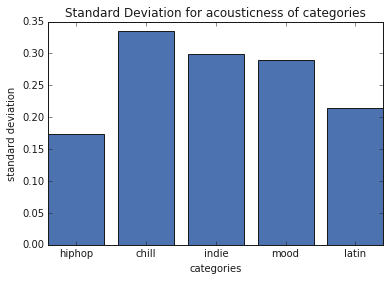

In [522]:
from statistics import stdev 
hhac = hiphopdf['acousticness']
hhac = stdev(hhac)
chillac = chilldf['acousticness']
chillac = stdev(chillac)
indieac = indiedf['acousticness']
indieac = stdev(indieac)
moodac = mooddf['acousticness']
moodac = stdev(moodac)
latinac = latindf['acousticness']
latinac = stdev(latinac)
stndac = ['hiphop','chill','indie','mood','latin']
acstd = [hhac,chillac,indieac,moodac,latinac]
plt.bar(stndac, acstd)
plt.title("Standard Deviation for acousticness of categories")
plt.xlabel("categories")
plt.ylabel("standard deviation")
#df["weight"].mean()
#latdance = stdev(latinD)
#mooddance = stdev(moodD)
#indiedance = stdev(indieD)
#chilldance = stdev(chillD)
#workoutdance = stdev(workoutD)
#danceCat = ['hiphop','latin','mood','indie','chill','workout']
#danceStd = [hhdance,latdance,mooddance,indiedance,chilldance,workoutdance]

#plt.bar(danceCat, danceStd)
#plt.title("Standard Deviation for Danceability of categories")
#plt.xlabel("categories")
#plt.ylabel("standard deviation")

In [ ]:
from statistics import stdev 
hhloud = hiphopdf['loudness']
hhloud = stdev(hhloud)
chillloud = chilldf['loudness']
chillloud = stdev(chillloud)
indieloud = indiedf['loudness']
indieloud = stdev(indieloud)
moodloud = mooddf['loudness']
moodloud = stdev(moodloud)
latinloud = latindf['loudness']
latinloud = stdev(latinloud)
stnd = ['hiphop','chill','indie','mood','latin']
loudstd = [hhloud,chillloud,indieloud,moodloud,latinloud]
plt.bar(stnd, loudstd)
plt.title("Standard Deviation for loudness of categories")
plt.xlabel("categories")
plt.ylabel("standard deviation")

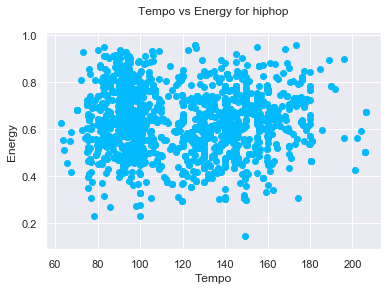

In [188]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy for hiphop\n")
plt.scatter(hiphopdf.tempo, hiphopdf.energy, color = '#03bafc')
plt.show()

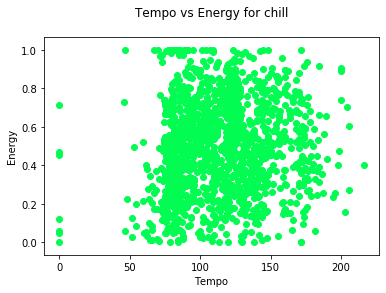

In [52]:
%matplotlib inline

plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy for chill\n")
plt.scatter(chilldf.tempo, chilldf.energy, color = '#03fc52')
plt.show()


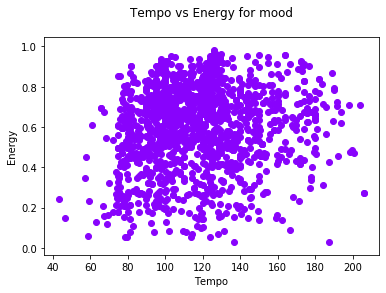

In [55]:
%matplotlib inline
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy for mood\n")
plt.scatter(mooddf.tempo, mooddf.energy, color = '#8803fc')
plt.show()

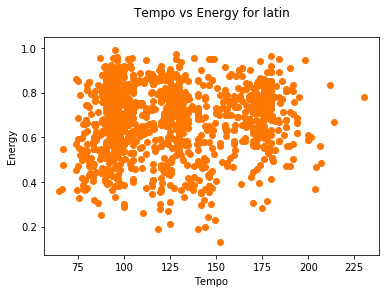

In [57]:
%matplotlib inline
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy for latin\n")
plt.scatter(latindf.tempo, latindf.energy, color = '#fc7703')
plt.show()

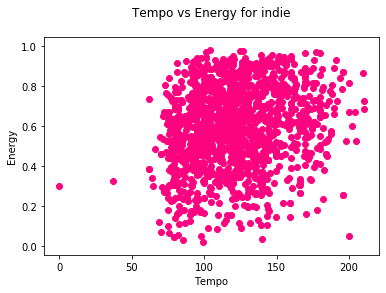

In [54]:
%matplotlib inline
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy for indie\n")
plt.scatter(indiedf.tempo, indiedf.energy, color = '#fc0380')
plt.show()

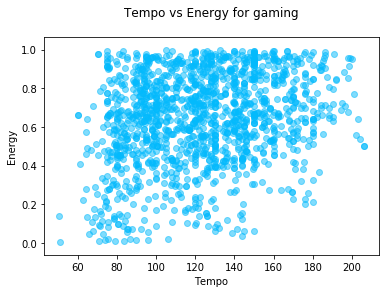

In [42]:
%matplotlib inline
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.title("Tempo vs Energy for gaming\n")
plt.scatter(gamingdf.tempo, gamingdf.energy, color = '#03bafc', alpha = 0.5)
plt.show()

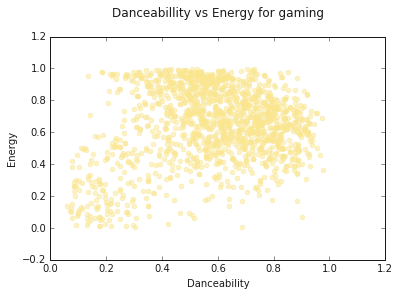

In [377]:
%matplotlib inline

plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceabillity vs Energy for gaming\n")
plt.scatter(gamingdf.danceability, gamingdf.energy, color ='#FAE68F', alpha=0.5)
plt.show()
#['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])

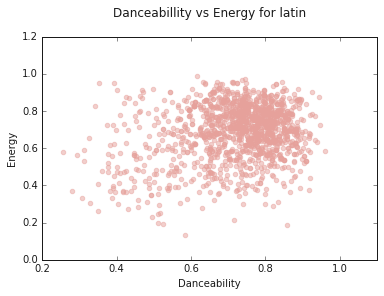

In [375]:
%matplotlib inline

plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceabillity vs Energy for latin\n")
plt.scatter(latindf.danceability, latindf.energy, color ='#E6A19B', alpha=0.5)
plt.show()

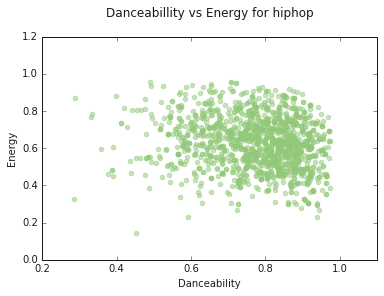

In [374]:
%matplotlib inline
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceabillity vs Energy for hiphop\n")
plt.scatter(hiphopdf.danceability, hiphopdf.energy, color ='#92C979', alpha=0.5)
plt.show()

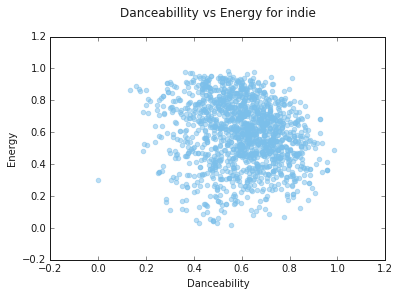

In [378]:
%matplotlib inline

plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceabillity vs Energy for indie\n")
plt.scatter(indiedf.danceability, indiedf.energy, color ='#7BBFEA', alpha=0.5)
plt.show()

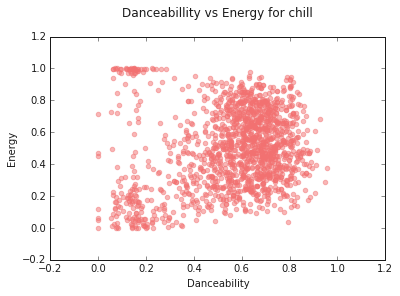

In [379]:
%matplotlib inline

plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceabillity vs Energy for chill\n")
plt.scatter(chilldf.danceability, chilldf.energy, color ='#F27171', alpha=0.5)
plt.show()

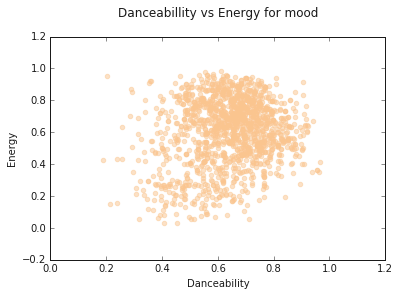

In [380]:
%matplotlib inline

plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceabillity vs Energy for mood\n")
plt.scatter(mooddf.danceability, mooddf.energy, color ='#FAC58F', alpha=0.5)
plt.show()

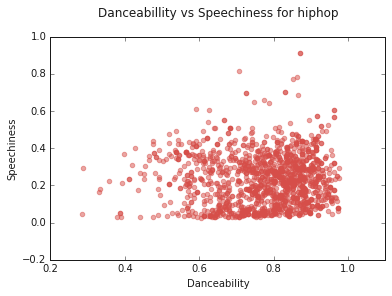

In [521]:
%matplotlib inline

plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title("Danceabillity vs Speechiness for hiphop\n")
plt.scatter(hiphopdf.danceability, hiphopdf.speechiness, color ='#D64E49', alpha=0.5)


In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

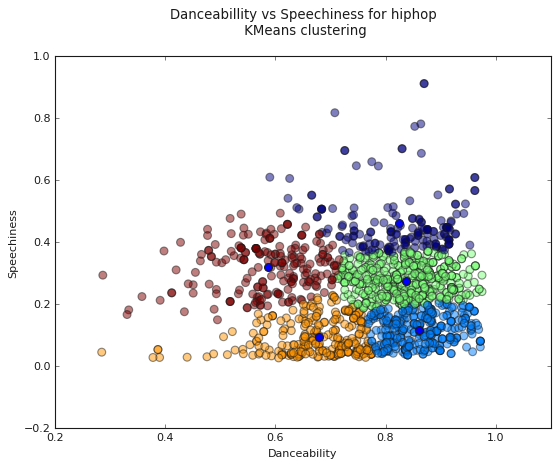

In [387]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

hhcopy = hiphopdf[['danceability','speechiness']]
kmeans = KMeans(n_clusters=5).fit(hhcopy)
centroids = kmeans.cluster_centers_

plt.scatter(hhcopy['danceability'], hhcopy['speechiness'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title("Danceabillity vs Speechiness for hiphop\n KMeans clustering\n")

plt.show()


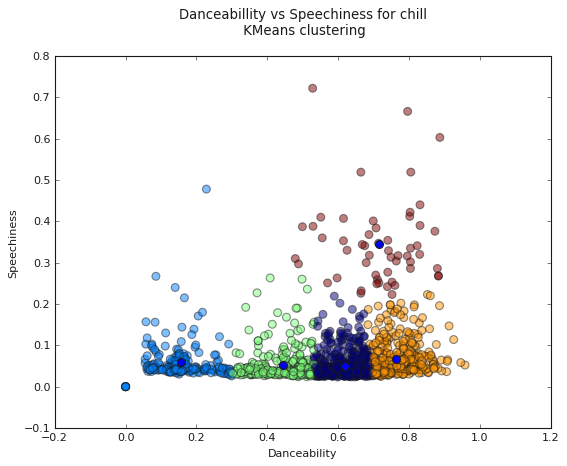

In [388]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

chillcopy = chilldf[['danceability','speechiness']]
kmeans = KMeans(n_clusters=5).fit(chillcopy)
centroids = kmeans.cluster_centers_

plt.scatter(chillcopy['danceability'], chillcopy['speechiness'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title("Danceabillity vs Speechiness for chill\n KMeans clustering\n")
plt.show()


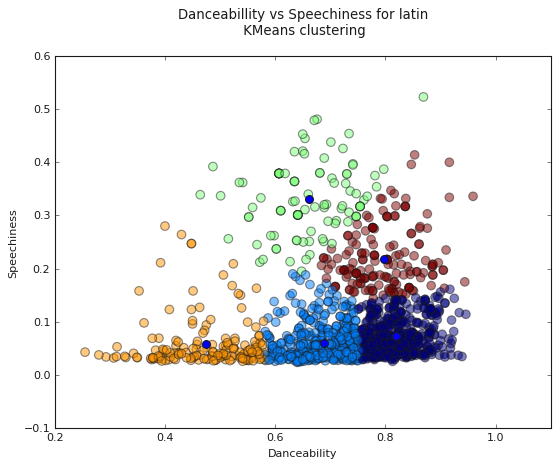

In [389]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot as plt
latincopy = latindf[['danceability','speechiness']]
kmeans = KMeans(n_clusters=5).fit(latincopy)
centroids = kmeans.cluster_centers_

plt.scatter(latincopy['danceability'], latincopy['speechiness'], c= kmeans.labels_.astype(float), s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title("Danceabillity vs Speechiness for latin\n KMeans clustering\n")
plt.show()



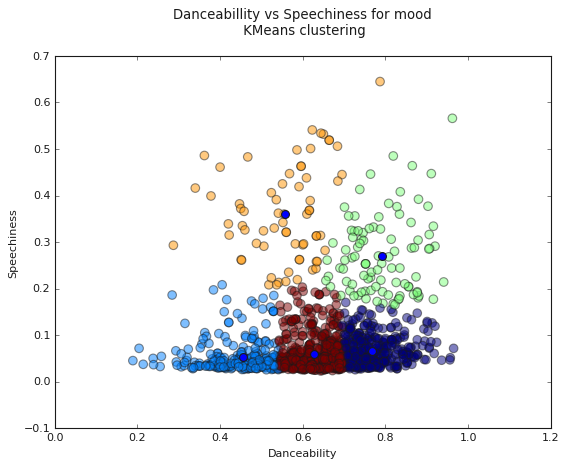

In [390]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot as plt
moodcopy = mooddf[['danceability','speechiness']]
kmeans = KMeans(n_clusters=5).fit(moodcopy)
centroids = kmeans.cluster_centers_

plt.scatter(moodcopy['danceability'], moodcopy['speechiness'], c= kmeans.labels_.astype(float), s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title("Danceabillity vs Speechiness for mood\n KMeans clustering\n")
plt.show()

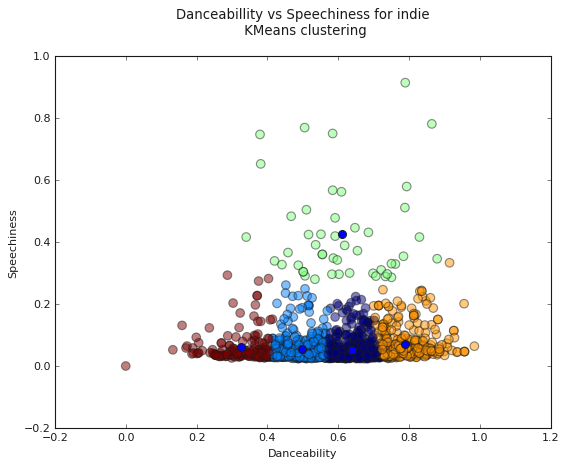

In [383]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot as plt
indiecopy = indiedf[['danceability','speechiness']]
kmeans = KMeans(n_clusters=5).fit(indiecopy)
centroids = kmeans.cluster_centers_

plt.scatter(indiecopy['danceability'], indiecopy['speechiness'], c= kmeans.labels_.astype(float), s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue',edgecolor='k', s=50)
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title("Danceabillity vs Speechiness for indie\n KMeans clustering\n")
plt.show()

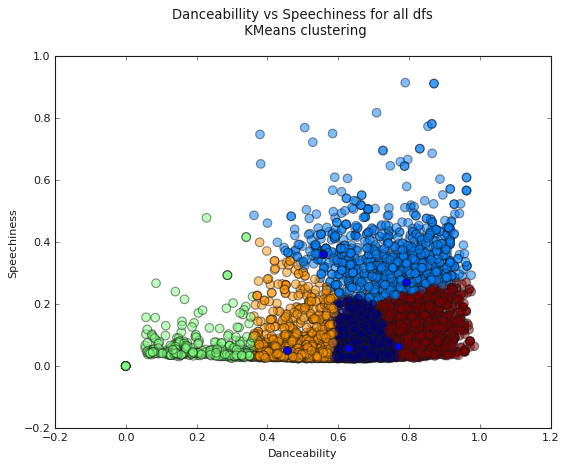

In [523]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot as plt
alldfcopy = alldfs[['danceability','speechiness']]
kmeans = KMeans(n_clusters=5).fit(alldfcopy)

plt.scatter(alldfcopy['danceability'], alldfcopy['speechiness'], c= kmeans.labels_.astype(float), s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue',edgecolor='k', s=50)

plt.xlabel("Danceability")
plt.ylabel("Speechiness")
plt.title("Danceabillity vs Speechiness for all dfs\n KMeans clustering\n")
plt.show()
#colormap = np.array(['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])
#fig, ax = plt.subplots(figsize=(6,4))
#for clust in range(kmeans.n_clusters):
    

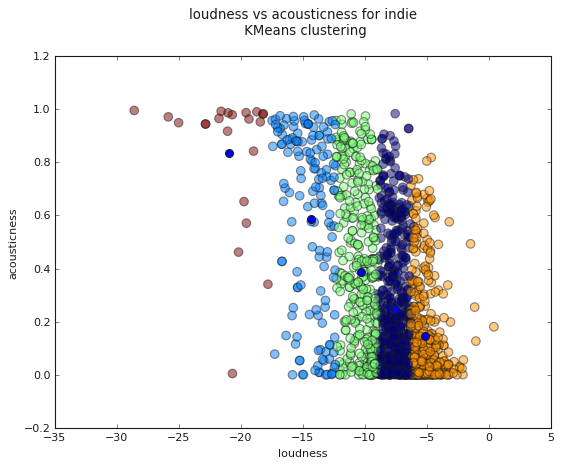

In [525]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot as plt
indiecopy = indiedf[['loudness','acousticness']]
kmeans = KMeans(n_clusters=5).fit(indiecopy)
centroids = kmeans.cluster_centers_

plt.scatter(indiecopy['loudness'], indiecopy['acousticness'], c= kmeans.labels_.astype(float), s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue',edgecolor='k', s=50)
plt.xlabel("loudness")
plt.ylabel("acousticness")
plt.title("loudness vs acousticness for indie\n KMeans clustering\n")
plt.show()

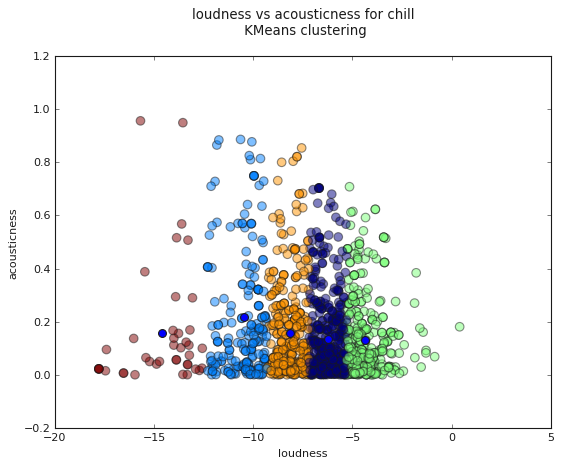

In [530]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot as plt
hiphopcopy = hiphopdf[['loudness','acousticness']]
kmeans = KMeans(n_clusters=5).fit(hiphopcopy)
centroids = kmeans.cluster_centers_

plt.scatter(hiphopcopy['loudness'], hiphopcopy['acousticness'], c= kmeans.labels_.astype(float), s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue',edgecolor='k', s=50)
plt.xlabel("loudness")
plt.ylabel("acousticness")
plt.title("loudness vs acousticness for chill\n KMeans clustering\n")
plt.show()

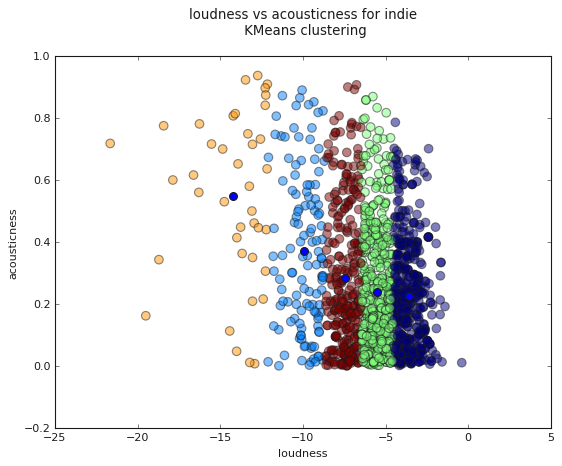

In [531]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
from matplotlib import pyplot as plt
latincopy = latindf[['loudness','acousticness']]
kmeans = KMeans(n_clusters=5).fit(latincopy)
centroids = kmeans.cluster_centers_

plt.scatter(latincopy['loudness'], latincopy['acousticness'], c= kmeans.labels_.astype(float), s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue',edgecolor='k', s=50)
plt.xlabel("loudness")
plt.ylabel("acousticness")
plt.title("loudness vs acousticness for indie\n KMeans clustering\n")
plt.show()

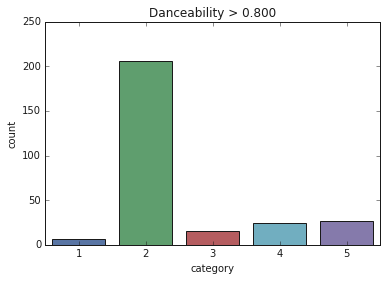

In [529]:
import seaborn as sns
%matplotlib inline
df_temp = alldfs[(alldfs['danceability']>0.900)]
plt.title("Danceability > 0.800")
sns.countplot(x="category", data = df_temp)



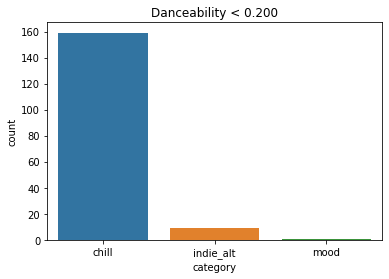

In [60]:
import seaborn as sns
%matplotlib inline
df_temp = alldfs[(alldfs['danceability']<0.200)]
plt.title("Danceability < 0.200")
sns.countplot(x="category", data = df_temp)


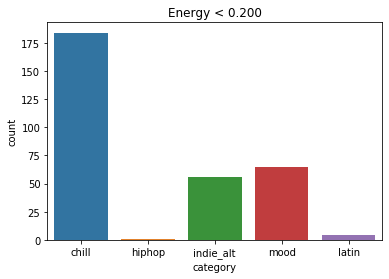

In [84]:
import seaborn as sns
%matplotlib inline
df_temp = alldfs[(alldfs['energy']<0.200)]
plt.title("Energy < 0.200")
sns.countplot(x="category", data = df_temp)

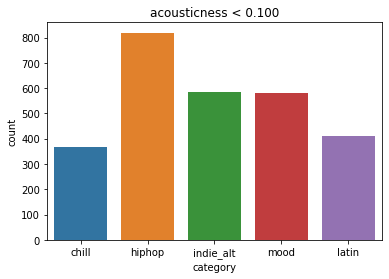

In [108]:
import seaborn as sns
%matplotlib inline
df_temp = alldfs[(alldfs['acousticness']<0.100)]
plt.title("acousticness < 0.100")
sns.countplot(x="category", data = df_temp)

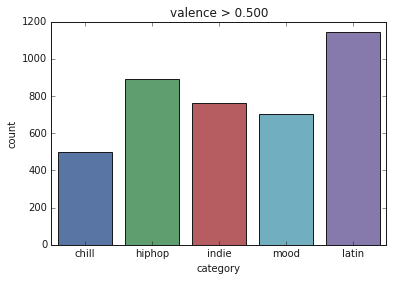

In [414]:
import seaborn as sns
%matplotlib inline
df_temp = alldf[(alldf['valence']>0.500)]
plt.title("valence > 0.500")
sns.countplot(x="category", data = df_temp)

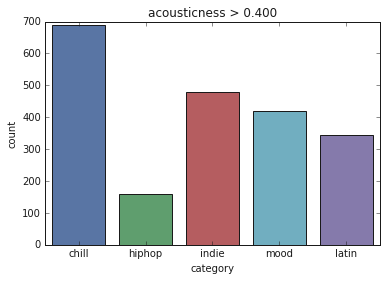

In [486]:
import seaborn as sns
%matplotlib inline
df_temp = alldf[(alldf['acousticness']>0.400)]
plt.title("acousticness > 0.400")
sns.countplot(x="category", data = df_temp)

# Machine Learning Part

#    Logistic Regression values for 5 categories

without any added features
The score for logistic regression is
Training:  49.90%
Test set:  48.82%


The score for logistic regression is
Training:  49.35%
Test set:  50.44%
'danceability > 0.9'
'energy < 0.200'

The score for logistic regression is
Training:  50.40%
Test set:  52.57%
'danceability > 0.9'
'energy < 0.200'
'danceability < 0.2'

The score for logistic regression is
Training:  49.83%
Test set:  50.91%
'danceability > 0.9'
'energy < 0.200'
'danceability < 0.2'
'acousticness < 0.100'

The score for logistic regression is
Training:  50.40%
Test set:  49.50%
'danceability > 0.9'
'energy < 0.200'
'danceability < 0.2'
'acousticness < 0.100'
alldfs'valence'*0.7 , '0') where valence > 0.500

The score for logistic regression is
Training:  49.87%
Test set:  50.10%
'danceability > 0.9'
'energy < 0.200'
'danceability < 0.2'
alldfs'acousticness'*0.7 where acousticness < 0.100
alldfs'valence'*0.7 , '0') where valence > 0.500

The score for logistic regression is
Training:  49.58%
Test set:  50.10%
alldfs['danceability > 0.9'] = np.where(alldfs['danceability']>=0.9, '1', '0')
alldfs['energy < 0.200']  = np.where(alldfs['energy'] <=0.200, alldfs['energy']*0.1, '0')
alldfs['danceability < 0.2'] = np.where(alldfs['danceability']<=0.2, alldfs['danceability']*0.1, '0')


The score for logistic regression is
Training:  49.31%
Test set:  49.76%
alldfs['danceability > 0.9'] = np.where(alldfs['danceability']>=0.9, '1', '0')
alldfs['energy < 0.200']  = np.where(alldfs['energy'] <=0.200, '1', '0')
alldfs['danceability < 0.2'] = np.where(alldfs['danceability']<=0.2, alldfs['danceability']*0.1, '0')

The score for logistic regression is
Training:  48.96%
Test set:  49.36%
alldfs['danceability > 0.9'] = np.where(alldfs['danceability']>=0.9, alldfs['danceability']*0.1, '0')
alldfs['energy < 0.200']  = np.where(alldfs['energy'] <=0.200, alldfs['energy']*0.1, '0')
alldfs['danceability < 0.2'] = np.where(alldfs['danceability']<=0.2, alldfs['danceability']*0.1, '0')


The score for logistic regression is
Training:  50.03%
Test set:  46.21%


dropping energy
The score for logistic regression is
Training:  50.34%
Test set:  49.03%

In [502]:
import numpy as np
#more features

alldfs['danceability > 0.9'] = np.where(alldfs['danceability']>=0.9, '1', '0')
alldfs['energy < 0.200']  = np.where(alldfs['energy'] <0.200, '1', '0')
alldfs['danceability < 0.2'] = np.where(alldfs['danceability']<0.2, '1', '0')
#alldfs['acousticness < 0.100'] = np.where(alldfs['acousticness']<0.100, '1', '0')
#alldfs['valence > 0.500'] = np.where(alldfs['valence'] > 0.500, alldfs['valence']*0.7 , '0')

alldfs


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,category,danceability > 0.9,energy < 0.200,danceability < 0.2
0,0.692,0.443,1,-5.671,1,0.0386,0.2140,0.0000,0.060,0.363,127.899,1,0,0,0
1,0.694,0.466,9,-6.758,1,0.0384,0.0934,0.0000,0.098,0.246,103.018,1,0,0,0
2,0.483,0.361,0,-7.889,1,0.0738,0.8320,0.0000,0.098,0.307,171.649,1,0,0,0
3,0.529,0.496,0,-6.668,0,0.1510,0.2140,0.0000,0.212,0.588,74.619,1,0,0,0
4,0.958,0.376,8,-7.063,1,0.0523,0.1710,0.0000,0.127,0.331,107.964,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.362,0.479,5,-11.761,0,0.0978,0.1290,0.0029,0.102,0.400,83.481,5,0,0,0
1441,0.524,0.190,2,-16.615,1,0.0493,0.6160,0.0000,0.249,0.563,118.518,5,0,1,0
1442,0.378,0.567,2,-6.591,1,0.0320,0.2700,0.0000,0.302,0.333,133.343,5,0,0,0
1443,0.394,0.452,0,-9.307,1,0.0261,0.0621,0.0001,0.471,0.599,73.984,5,0,0,0


In [544]:
import numpy as np
#more features
threedfs['danceability > 0.9'] = np.where(threedfs['danceability']>=0.9, '1', '0')
threedfs['energy < 0.200']  = np.where(threedfs['energy'] <0.200, '1', '0')
threedfs['danceability < 0.2'] = np.where(threedfs['danceability']<0.2, '1', '0')
#alldfs['acousticness < 0.100'] = np.where(alldfs['acousticness']<0.100, '1', '0')
#alldfs['valence > 0.500'] = np.where(alldfs['valence'] > 0.500, alldfs['valence']*0.7 , '0')
threedfs['acousticness > 0.4'] = np.where(threedfs['acousticness']>0.4, '1', '0')
threedfs = threedfs.drop(['energy < 0.200'], axis=1)
threedfs = threedfs.drop(['danceability < 0.2'], axis=1)
threedfs = threedfs.drop(['acousticness > 0.4'], axis=1)

threedfs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,category,danceability > 0.9
0,0.692,0.443,1,-5.671,1,0.0386,0.2140,0.0000,0.0600,0.3630,127.899,1,0
1,0.694,0.466,9,-6.758,1,0.0384,0.0934,0.0000,0.0980,0.2460,103.018,1,0
2,0.483,0.361,0,-7.889,1,0.0738,0.8320,0.0000,0.0980,0.3070,171.649,1,0
3,0.529,0.496,0,-6.668,0,0.1510,0.2140,0.0000,0.2120,0.5880,74.619,1,0
4,0.958,0.376,8,-7.063,1,0.0523,0.1710,0.0000,0.1270,0.3310,107.964,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.491,0.754,1,-7.376,0,0.1840,0.0856,0.3370,0.1390,0.2420,74.862,3,0
1496,0.459,0.715,7,-7.352,1,0.0732,0.0095,0.0008,0.1120,0.3520,179.959,3,0
1497,0.775,0.589,8,-9.826,0,0.0559,0.4280,0.7140,0.0819,0.4360,126.971,3,0
1498,0.682,0.381,3,-11.992,1,0.0310,0.3140,0.0000,0.1810,0.5140,91.995,3,0


In [549]:
threedfs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,category,danceability > 0.9
0,0.692,0.443,1,-5.671,1,0.0386,0.2140,0.0000,0.0600,0.3630,127.899,1,0
1,0.694,0.466,9,-6.758,1,0.0384,0.0934,0.0000,0.0980,0.2460,103.018,1,0
2,0.483,0.361,0,-7.889,1,0.0738,0.8320,0.0000,0.0980,0.3070,171.649,1,0
3,0.529,0.496,0,-6.668,0,0.1510,0.2140,0.0000,0.2120,0.5880,74.619,1,0
4,0.958,0.376,8,-7.063,1,0.0523,0.1710,0.0000,0.1270,0.3310,107.964,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.491,0.754,1,-7.376,0,0.1840,0.0856,0.3370,0.1390,0.2420,74.862,3,0
1496,0.459,0.715,7,-7.352,1,0.0732,0.0095,0.0008,0.1120,0.3520,179.959,3,0
1497,0.775,0.589,8,-9.826,0,0.0559,0.4280,0.7140,0.0819,0.4360,126.971,3,0
1498,0.682,0.381,3,-11.992,1,0.0310,0.3140,0.0000,0.1810,0.5140,91.995,3,0


In [570]:
#for 3 categories
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


train_dataset3 = threedfs.sample(frac=0.8,random_state=0)
test_dataset3 = threedfs.drop(train_dataset3.index)

X_train3, X_test3, label_train3, label_test3 = train_test_split(threedfs.drop('category', axis=1), threedfs['category'], 
                                                            test_size=0.2, random_state=112)


logit = LogisticRegression(C = 0.95)
lrfit = logit.fit(X_train3, label_train3)
print("The accuracy for logistic regression is")
print("Test set: {:6.2f}%".format(100*logit.score(X_test3, label_test3)))

The accuracy for logistic regression is
Test set:  66.44%


/Users/radhakatkamwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/radhakatkamwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [557]:
#not normalized values
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

shuffled = alldfs.sample(frac=1)
shuf = copy
train_dataset = shuffled.sample(frac=0.8,random_state=0)
test_dataset = shuffled.drop(train_dataset.index)
X_train, X_test, label_train, label_test = train_test_split(shuffled.drop('category', axis=1), shuffled['category'], 
                                                            test_size=0.2, random_state=112)

logit = LogisticRegression(C = 0.95)
lrfit = logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

/Users/radhakatkamwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/radhakatkamwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The score for logistic regression is
Test set:  51.85%


In [552]:

#for 5 categories 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
nb = GaussianNB()
nb.fit(X_train, label_train)
print("The score of naive bayes is:")
print(nb.score(X_test, label_test))

The score of naive bayes is:
0.40698455339153794


In [539]:
#for 5 categories
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(max_depth=15)
decisiontree.fit(X_train, label_train)
print("The score for decision tree is:")
print(decisiontree.score(X_test, label_test))

The score for decision tree is:
0.5211551376762928


In [569]:
#for 3 categories hiphop, chill, indie
from sklearn.naive_bayes import MultinomialNB, GaussianNB
nb = GaussianNB()
nb.fit(X_train3, label_train3)
print("The score for naive bayes is:")
nb.score(X_test3, label_test3)

The score for naive bayes is:


0.6277777777777778

In [568]:
#for 3 categories hiphop, chill, indie
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(max_depth=15)
print("The score for decision tree is:")
decisiontree.fit(X_train3, label_train3)
decisiontree.score(X_test3, label_test3)

The score for decision tree is:


0.6411111111111111

In [482]:
train_stats = train_dataset.describe()
#train_stats.pop('category')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
danceability,3600.0,0.647676,0.185903,0.0000,0.551000,0.6680,0.785250,0.975
energy,3600.0,0.573275,0.204510,0.0002,0.449000,0.5910,0.721000,1.000
key,3600.0,5.198333,3.642788,0.0000,1.000000,5.0000,8.000000,11.000
loudness,3600.0,-8.710946,4.374549,-42.6940,-10.196000,-7.6820,-5.853000,0.402
mode,3600.0,0.656389,0.474979,0.0000,0.000000,1.0000,1.000000,1.000
speechiness,3600.0,0.122788,0.126432,0.0000,0.036900,0.0578,0.179000,0.914
acousticness,3600.0,0.286385,0.298169,0.0000,0.040400,0.1640,0.474000,0.995
instrumentalness,3600.0,0.151973,0.304675,0.0000,0.000000,0.0001,0.055075,0.999
liveness,3600.0,0.178287,0.148397,0.0255,0.097975,0.1190,0.197000,0.982
valence,3600.0,0.478665,0.244479,0.0000,0.293000,0.4870,0.667000,0.974


In [509]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
shuff = alldfs
shuff
#shuff = shuff.drop(['category'], axis = 1)
train_dataset = shuff.sample(frac=0.8,random_state=0)
test_dataset = shuff.drop(train_dataset.index)

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
test_dataset

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [241]:
#normalized values training
X_train, X_test, label_train, label_test = train_test_split(normed_train_data.drop('category', axis=1), train_dataset['category'], 
                                                            test_size=0.2, random_state=112)
logit = LogisticRegression(C = 0.95)
lrfit = logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))


The score for logistic regression is
Training:  49.62%
Test set:  47.48%


/Users/radhakatkamwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/radhakatkamwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 1.0, 'Average Audio Feautures for workout')

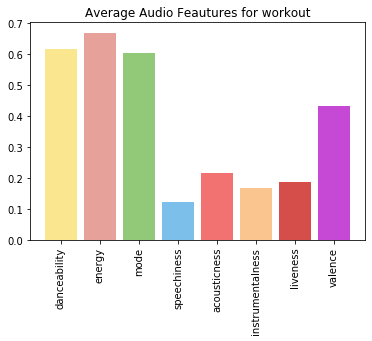

In [21]:
import matplotlib.pyplot as plt

workoutD = []
workoutE = []
workoutK = []
workoutL = []
workoutM = []
workoutS = []
workoutA = []
workoutI = []
workoutLi = []
workoutV = []
workoutT = []

workoutdanceav = []
workoutenav = []
workoutkeyav = []
workoutloudav = []
workoutmodeav = []
workoutspav = []
workoutacav = []
workoutinav = []
workoutliav = []
workoutvaav = []
workouttempoav = []

# key and tempo left out
#testingchill.append(round((segs.get('danceability')),4))
workout = getAllfeatures(category_id='workout')
for segs in workout:
    workoutD.append(round((segs.get('danceability')),4))
    workoutE.append(round((segs.get('energy')),4))
    workoutK.append(round((segs.get('key')),4))
    workoutL.append(round((segs.get('loudness')),4))
    workoutM.append(round((segs.get('mode')),4))
    workoutS.append(round((segs.get('speechiness')),4))
    workoutA.append(round((segs.get('acousticness')),4))
    workoutI.append(round((segs.get('instrumentalness')),4))
    workoutLi.append(round((segs.get('liveness')),4))
    workoutV.append(round((segs.get('valence')),4))
    workoutT.append(round((segs.get('tempo')),4))

workoutdanceav.append(sum(workoutD) / len(workoutD))
workoutenav.append(sum(workoutE) / len(workoutE))
workoutkeyav.append(sum(workoutK) / len(workoutK))
workoutloudav.append(sum(workoutL) / len(workoutL))
workoutmodeav.append(sum(workoutM) / len(workoutM))
workoutspav.append(sum(workoutS) / len(workoutS))
workoutacav.append(sum(workoutA) / len(workoutA))
workoutinav.append(sum(workoutI) / len(workoutI))
workoutliav.append(sum(workoutLi) / len(workoutLi))
workoutvaav.append(sum(workoutV) / len(workoutV))
workouttempoav.append(sum(workoutT) / len(workoutT))

allaveragesforworkout = workoutdanceav + workoutenav + workoutmodeav + workoutspav + workoutacav + workoutinav + workoutliav + workoutvaav
featworkout = ["danceability", "energy", "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
              "valence"]
plt.bar(featworkout, allaveragesforworkout,
        color=['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])
plt.xticks(featworkout, featworkout, rotation='vertical')
plt.title("Average Audio Feautures for workout")

Text(0.5, 1.0, 'Average Audio Feautures for chill')

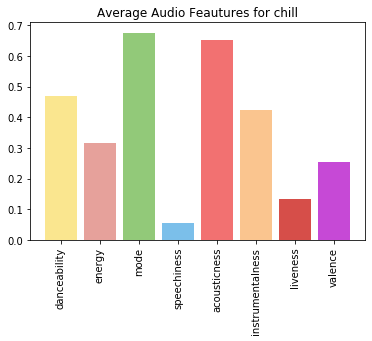

In [22]:
import matplotlib.pyplot as plt

chillD = []
chillE = []
chillK = []
chillL = []
chillM = []
chillS = []
chillA = []
chillI = []
chillLi = []
chillV = []
chillT = []

chilldanceav = []
chillenav = []
chillkeyav = []
chillloudav = []
chillmodeav = []
chillspav = []
chillacav = []
chillinav = []
chillliav = []
chillvaav = []
chilltempoav = []

# key and tempo left out
#testingchill.append(round((segs.get('danceability')),4))
chill = getAllfeatures(category_id='chill')
for segs in chill:
    chillD.append(round((segs.get('danceability')),4))
    chillE.append(round((segs.get('energy')),4))
    chillK.append(round((segs.get('key')),4))
    chillL.append(round((segs.get('loudness')),4))
    chillM.append(round((segs.get('mode')),4))
    chillS.append(round((segs.get('speechiness')),4))
    chillA.append(round((segs.get('acousticness')),4))
    chillI.append(round((segs.get('instrumentalness')),4))
    chillLi.append(round((segs.get('liveness')),4))
    chillV.append(round((segs.get('valence')),4))
    chillT.append(round((segs.get('tempo')),4))

chilldanceav.append(sum(chillD) / len(chillD))
chillenav.append(sum(chillE) / len(chillE))
chillkeyav.append(sum(chillK) / len(chillK))
chillloudav.append(sum(chillL) / len(chillL))
chillmodeav.append(sum(chillM) / len(chillM))
chillspav.append(sum(chillS) / len(chillS))
chillacav.append(sum(chillA) / len(chillA))
chillinav.append(sum(chillI) / len(chillI))
chillliav.append(sum(chillLi) / len(chillLi))
chillvaav.append(sum(chillV) / len(chillV))
chilltempoav.append(sum(chillT) / len(chillT))

allaveragesforchill = chilldanceav + chillenav + chillmodeav + chillspav + chillacav + chillinav + chillliav + chillvaav
featchill = ["danceability", "energy", "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
              "valence"]
plt.bar(featchill, allaveragesforchill,
        color=['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])
plt.xticks(featchill, featchill, rotation='vertical')
plt.title("Average Audio Feautures for chill")

Text(0.5, 1.0, 'Average Audio Feautures for indie_alt')

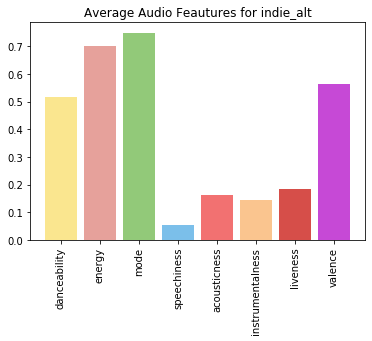

In [23]:
import matplotlib.pyplot as plt

indieD = []
indieE = []
indieK = []
indieL = []
indieM = []
indieS = []
indieA = []
indieI = []
indieLi = []
indieV = []
indieT = []

indiedanceav = []
indieenav = []
indiekeyav = []
indieloudav = []
indiemodeav = []
indiespav = []
indieacav = []
indieinav = []
indieliav = []
indievaav = []
indietempoav = []

# key and tempo left out
#testingindie.append(round((segs.get('danceability')),4))
indie = getAllfeatures(category_id='indie_alt')
for segs in indie:
    indieD.append(round((segs.get('danceability')),4))
    indieE.append(round((segs.get('energy')),4))
    indieK.append(round((segs.get('key')),4))
    indieL.append(round((segs.get('loudness')),4))
    indieM.append(round((segs.get('mode')),4))
    indieS.append(round((segs.get('speechiness')),4))
    indieA.append(round((segs.get('acousticness')),4))
    indieI.append(round((segs.get('instrumentalness')),4))
    indieLi.append(round((segs.get('liveness')),4))
    indieV.append(round((segs.get('valence')),4))
    indieT.append(round((segs.get('tempo')),4))

indiedanceav.append(sum(indieD) / len(indieD))
indieenav.append(sum(indieE) / len(indieE))
indiekeyav.append(sum(indieK) / len(indieK))
indieloudav.append(sum(indieL) / len(indieL))
indiemodeav.append(sum(indieM) / len(indieM))
indiespav.append(sum(indieS) / len(indieS))
indieacav.append(sum(indieA) / len(indieA))
indieinav.append(sum(indieI) / len(indieI))
indieliav.append(sum(indieLi) / len(indieLi))
indievaav.append(sum(indieV) / len(indieV))
indietempoav.append(sum(indieT) / len(indieT))

allaveragesforindie = indiedanceav + indieenav + indiemodeav + indiespav + indieacav + indieinav + indieliav + indievaav
featindie = ["danceability", "energy", "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
              "valence"]
plt.bar(featindie, allaveragesforindie,
        color=['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])
plt.xticks(featindie, featindie, rotation='vertical')
plt.title("Average Audio Feautures for indie_alt")

Text(0.5, 1.0, 'Average Audio Feautures for mood')

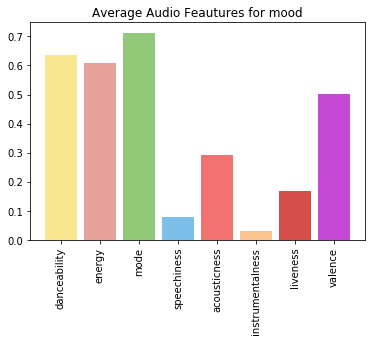

In [24]:
import matplotlib.pyplot as plt

moodD = []
moodE = []
moodK = []
moodL = []
moodM = []
moodS = []
moodA = []
moodI = []
moodLi = []
moodV = []
moodT = []

mooddanceav = []
moodenav = []
moodkeyav = []
moodloudav = []
moodmodeav = []
moodspav = []
moodacav = []
moodinav = []
moodliav = []
moodvaav = []
moodtempoav = []

# key and tempo left out
#testingmood.append(round((segs.get('danceability')),4))
mood = getAllfeatures(category_id='mood')
for segs in mood:
    moodD.append(round((segs.get('danceability')),4))
    moodE.append(round((segs.get('energy')),4))
    moodK.append(round((segs.get('key')),4))
    moodL.append(round((segs.get('loudness')),4))
    moodM.append(round((segs.get('mode')),4))
    moodS.append(round((segs.get('speechiness')),4))
    moodA.append(round((segs.get('acousticness')),4))
    moodI.append(round((segs.get('instrumentalness')),4))
    moodLi.append(round((segs.get('liveness')),4))
    moodV.append(round((segs.get('valence')),4))
    moodT.append(round((segs.get('tempo')),4))

mooddanceav.append(sum(moodD) / len(moodD))
moodenav.append(sum(moodE) / len(moodE))
moodkeyav.append(sum(moodK) / len(moodK))
moodloudav.append(sum(moodL) / len(moodL))
moodmodeav.append(sum(moodM) / len(moodM))
moodspav.append(sum(moodS) / len(moodS))
moodacav.append(sum(moodA) / len(moodA))
moodinav.append(sum(moodI) / len(moodI))
moodliav.append(sum(moodLi) / len(moodLi))
moodvaav.append(sum(moodV) / len(moodV))
moodtempoav.append(sum(moodT) / len(moodT))

allaveragesformood = mooddanceav + moodenav + moodmodeav + moodspav + moodacav + moodinav + moodliav + moodvaav
featmood = ["danceability", "energy", "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
              "valence"]
plt.bar(featmood, allaveragesformood,
        color=['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])
plt.xticks(featmood, featmood, rotation='vertical')
plt.title("Average Audio Feautures for mood")

Text(0.5, 1.0, 'Average Audio Feautures for latin')

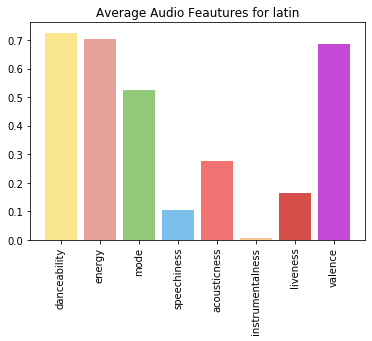

In [25]:
import matplotlib.pyplot as plt

latinD = []
latinE = []
latinK = []
latinL = []
latinM = []
latinS = []
latinA = []
latinI = []
latinLi = []
latinV = []
latinT = []

latindanceav = []
latinenav = []
latinkeyav = []
latinloudav = []
latinmodeav = []
latinspav = []
latinacav = []
latininav = []
latinliav = []
latinvaav = []
latintempoav = []

# key and tempo left out
#testinglatin.append(round((segs.get('danceability')),4))
latin = getAllfeatures(category_id='latin')
for segs in latin:
    latinD.append(round((segs.get('danceability')),4))
    latinE.append(round((segs.get('energy')),4))
    latinK.append(round((segs.get('key')),4))
    latinL.append(round((segs.get('loudness')),4))
    latinM.append(round((segs.get('mode')),4))
    latinS.append(round((segs.get('speechiness')),4))
    latinA.append(round((segs.get('acousticness')),4))
    latinI.append(round((segs.get('instrumentalness')),4))
    latinLi.append(round((segs.get('liveness')),4))
    latinV.append(round((segs.get('valence')),4))
    latinT.append(round((segs.get('tempo')),4))

latindanceav.append(sum(latinD) / len(latinD))
latinenav.append(sum(latinE) / len(latinE))
latinkeyav.append(sum(latinK) / len(latinK))
latinloudav.append(sum(latinL) / len(latinL))
latinmodeav.append(sum(latinM) / len(latinM))
latinspav.append(sum(latinS) / len(latinS))
latinacav.append(sum(latinA) / len(latinA))
latininav.append(sum(latinI) / len(latinI))
latinliav.append(sum(latinLi) / len(latinLi))
latinvaav.append(sum(latinV) / len(latinV))
latintempoav.append(sum(latinT) / len(latinT))

allaveragesforlatin = latindanceav + latinenav + latinmodeav + latinspav + latinacav + latininav + latinliav + latinvaav
featlatin = ["danceability", "energy", "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
              "valence"]
plt.bar(featlatin, allaveragesforlatin,
        color=['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])
plt.xticks(featlatin, featlatin, rotation='vertical')
plt.title("Average Audio Feautures for latin")

Text(0.5, 1.0, 'Average Audio Feautures for hiphop')

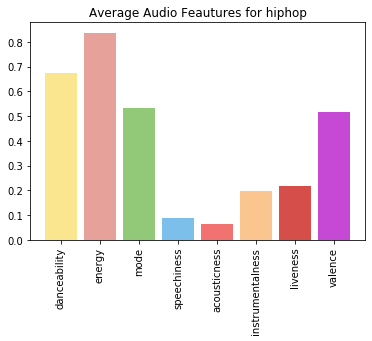

In [27]:
import matplotlib.pyplot as plt

hiphopD = []
hiphopE = []
hiphopK = []
hiphopL = []
hiphopM = []
hiphopS = []
hiphopA = []
hiphopI = []
hiphopLi = []
hiphopV = []
hiphopT = []

hiphopdanceav = []
hiphopenav = []
hiphopkeyav = []
hiphoploudav = []
hiphopmodeav = []
hiphopspav = []
hiphopacav = []
hiphopinav = []
hiphopliav = []
hiphopvaav = []
hiphoptempoav = []

# key and tempo left out
#testinghiphop.append(round((segs.get('danceability')),4))
hiphop = getAllfeatures(category_id='party')
for segs in hiphop:
    hiphopD.append(round((segs.get('danceability')),4))
    hiphopE.append(round((segs.get('energy')),4))
    hiphopK.append(round((segs.get('key')),4))
    hiphopL.append(round((segs.get('loudness')),4))
    hiphopM.append(round((segs.get('mode')),4))
    hiphopS.append(round((segs.get('speechiness')),4))
    hiphopA.append(round((segs.get('acousticness')),4))
    hiphopI.append(round((segs.get('instrumentalness')),4))
    hiphopLi.append(round((segs.get('liveness')),4))
    hiphopV.append(round((segs.get('valence')),4))
    hiphopT.append(round((segs.get('tempo')),4))

hiphopdanceav.append(sum(hiphopD) / len(hiphopD))
hiphopenav.append(sum(hiphopE) / len(hiphopE))
hiphopkeyav.append(sum(hiphopK) / len(hiphopK))
hiphoploudav.append(sum(hiphopL) / len(hiphopL))
hiphopmodeav.append(sum(hiphopM) / len(hiphopM))
hiphopspav.append(sum(hiphopS) / len(hiphopS))
hiphopacav.append(sum(hiphopA) / len(hiphopA))
hiphopinav.append(sum(hiphopI) / len(hiphopI))
hiphopliav.append(sum(hiphopLi) / len(hiphopLi))
hiphopvaav.append(sum(hiphopV) / len(hiphopV))
hiphoptempoav.append(sum(hiphopT) / len(hiphopT))

allaveragesforhiphop = hiphopdanceav + hiphopenav + hiphopmodeav + hiphopspav + hiphopacav + hiphopinav + hiphopliav + hiphopvaav
feathiphop = ["danceability", "energy", "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
              "valence"]
plt.bar(feathiphop, allaveragesforhiphop,
        color=['#FAE68F', '#E6A19B', '#92C979', '#7BBFEA', '#F27171', '#FAC58F', '#D64E49', '#C649D6'])
plt.xticks(feathiphop, feathiphop, rotation='vertical')
plt.title("Average Audio Feautures for hiphop")

In [79]:
import altair as alt

plt.figure(figsize=(10,10))
df_temp = alldfs[(alldfs['category']=='chill')]
df_temp = df_temp["key"].value_counts()
df_temp = df_temp.reset_index()
df_temp.rename(columns={"index": "key for 'chill'", "key": "Counts"})

newdf = df_temp.rename(columns={"index": "key for chill", "key": "Counts"})
alt.Chart(newdf).mark_bar().encode(
    x='key for chill',
    y='Counts:Q'
)


alt.Chart(...)

<Figure size 720x720 with 0 Axes>

In [80]:
plt.figure(figsize=(10,10))
df_temp = alldfs[(alldfs['category']=='latin')]
df_temp = df_temp["key"].value_counts()
df_temp = df_temp.reset_index()
df_temp.rename(columns={"index": "key for 'latin'", "key": "Counts"})

newdf = df_temp.rename(columns={"index": "key for latin", "key": "Counts"})
alt.Chart(newdf).mark_bar().encode(
    x='key for latin',
    y='Counts:Q'
)

alt.Chart(...)

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'standard deviation')

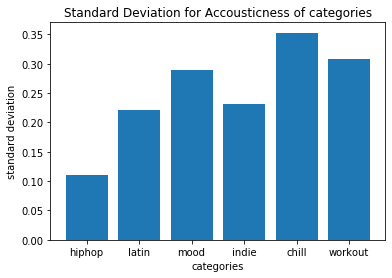

In [137]:
from statistics import stdev 
hhacc = stdev(hiphopA)
latacc = stdev(latinA)
moodacc = stdev(moodA)
indieacc = stdev(indieA)
chillacc = stdev(chillA)
workoutacc = stdev(workoutA)
accousticsCat = ['hiphop','latin','mood','indie','chill','workout']
accousticsStd = [hhacc,latacc,moodacc,indieacc,chillacc,workoutacc]

plt.bar(accousticsCat, accousticsStd)
plt.title("Standard Deviation for Accousticness of categories")
plt.xlabel("categories")
plt.ylabel("standard deviation")

Text(0, 0.5, 'standard deviation')

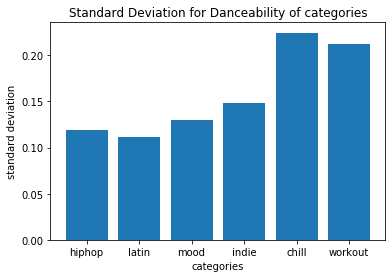

In [140]:
hhdance = stdev(hiphopD)
latdance = stdev(latinD)
mooddance = stdev(moodD)
indiedance = stdev(indieD)
chilldance = stdev(chillD)
workoutdance = stdev(workoutD)
danceCat = ['hiphop','latin','mood','indie','chill','workout']
danceStd = [hhdance,latdance,mooddance,indiedance,chilldance,workoutdance]

plt.bar(danceCat, danceStd)
plt.title("Standard Deviation for Danceability of categories")
plt.xlabel("categories")
plt.ylabel("standard deviation")